# Primary Objective:

This project analyzes a dataset of Youtube to uncover key insights of youtube. The analysis uses various visualizations to explore aspects such as Revenue estimates, views counts,video counts and geographical distribution of Youtube Channels.

# Problem Statement:-  


However, you are mandatorily supposed to solve EDA Task based on Youtube data


    1. Which variables are most significant with respect to the target variable?

    2. Explore the data distribution of each column. Identify some important patterns.

    3. Insights and Recommendations (i.e. Data Driven Business Decision)

Write proper conclusions and provide recommendations to the bank based on the
insights.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("youtube_dataset.csv")

In [3]:
df

,channel_name,subscribers,category,views_counts,video_count,started_year,rank
0,\nT-Series\n,"252,000,000",Music,"237,488,717,837","19,794",2006,1
1,\nSET India\n,"164,000,000",Shows,"153,562,562,482","121,019",2006,2
2,\nSony SAB\n,"86,700,000",Shows,"106,373,500,472","75,313",2007,3
3,\nColors TV\n,"68,200,000",Shows,"65,471,430,109","121,710",2008,4
4,\nZee Music Company\n,"102,000,000",Music,"61,556,002,571","9,408",2014,5
...,...,...,...,...,...,...,...
995,\nHitz Music\n,"4,280,000",Music,"1,230,990,611",732,2017,996
996,\nGaane Filmi\n,"2,790,000",Music,"1,230,850,659",407,2021,997
997,\nVijay shorts\n,"1,790,000",People & Blogs,"1,228,515,815","1,228",2019,998
998,\nElvish Yadav Vlogs\n,"7,570,000",People & Blogs,"1,228,220,319",732,2019,999


# Understanding the data

In [4]:
df.head(10)

,channel_name,subscribers,category,views_counts,video_count,started_year,rank
0,\nT-Series\n,"252,000,000",Music,"237,488,717,837","19,794",2006,1
1,\nSET India\n,"164,000,000",Shows,"153,562,562,482","121,019",2006,2
2,\nSony SAB\n,"86,700,000",Shows,"106,373,500,472","75,313",2007,3
3,\nColors TV\n,"68,200,000",Shows,"65,471,430,109","121,710",2008,4
4,\nZee Music Company\n,"102,000,000",Music,"61,556,002,571","9,408",2014,5
5,\nChuChu TV Nursery Rhymes & Kids Songs\n,"68,500,000",Education,"48,012,185,336",715,2013,6
6,\nWave Music\n,"59,500,000",Music,"41,342,735,314","19,720",2014,7
7,\nYRF\n,"56,800,000",Film & Animation,"37,545,079,015","3,843",2006,8
8,\nTips Official\n,"62,000,000",Music,"35,324,377,300","5,093",2007,9
9,\nVijay Television\n,"21,800,000",Entertainment,"33,261,234,887","57,945",2007,10


In [5]:
df.shape

(1000, 7)

In [6]:
df.dtypes

channel_name    object
subscribers     object
category        object
views_counts    object
video_count     object
started_year     int64
rank             int64
dtype: object

In [7]:
df.describe()

,started_year,rank
count,1000.000000,1000.000000
mean,2015.737000,500.500000
std,3.739762,288.819436
min,2005.000000,1.000000
25%,2013.000000,250.750000
50%,2016.000000,500.500000
75%,2019.000000,750.250000
max,2022.000000,1000.000000


In [8]:
df.index.duplicated(keep = 'first').sum()

0

In [9]:
df.isna().sum(axis = 0)

channel_name     0
subscribers      0
category        82
views_counts     0
video_count      0
started_year     0
rank             0
dtype: int64

#### Observation:-

    We have checked that the data has a non-duplicate index list, and there are category column having missing values in the data set. Now, let's dive into each column and do some data cleaning.

# Data Cleaning

In [10]:
df=df.drop(['rank'],axis=1)

In [11]:
col=[col.strip() for col in df['channel_name']]

In [12]:
df['channel_name']=col

In [13]:
df= df.reset_index(drop=True)

In [14]:
df.dtypes

channel_name    object
subscribers     object
category        object
views_counts    object
video_count     object
started_year     int64
dtype: object

In [15]:
df.shape

(1000, 6)

In [16]:
df.isnull().sum()

channel_name     0
subscribers      0
category        82
views_counts     0
video_count      0
started_year     0
dtype: int64

#### Observation:-

    The raw dataset the shape of the data is 1000 rows and 7 columns uniques titles; However,96 of these titles appearoly once,55 appears twice, and titles occuring at least five times compirse approximately 62% of our raw data. To ensure sufficient data for each title we analyze, we will retain only those titles that occur five times or more, and we will consolidate the remaining titles into these more frequently occurring categories.

    To accomplish this, we will first assess the similarities between the titles that appear less than five times and those that appear at least five times. Based on this assessment, we will then group similar titles under a common title.

In [17]:
df['channel_name'].unique()

array(['T-Series', 'SET India', 'Sony SAB', 'Colors TV',
       'Zee Music Company', 'ChuChu TV Nursery Rhymes & Kids Songs',
       'Wave Music', 'YRF', 'Tips Official', 'Vijay Television',
       'Infobells - Hindi', 'T-Series Bhakti Sagar', 'Sony Music India',
       'Speed Records', 'Aaj Tak', 'Aditya Music India', 'Goldmines',
       'KL BRO Biju Rithvik', 'Sun TV', 'T-Series Bollywood Classics',
       'etvteluguindia', 'Shemaroo', 'Shorts Break',
       'T-Series Apna Punjab', 'Dushyant kukreja', 'ZEE5', 'Zee News',
       'infobells - Tamil', 'Mazhavil Manorama',
       'Goldmines Gaane Sune Ansune', 'IndiaTV', 'WowKidz',
       'Worldwide Records Bhojpuri', 'Jkk Entertainment', 'Tarang TV',
       'Dangal TV Channel', 'Ultra Bollywood', 'Asianet',
       'infobells - Telugu', 'Rajshri', 'Ishaan Ali 11', 'Gulshan Kalra',
       'ABP NEWS', 'Priyal Kukreja', 'ETV Jabardasth', 'BehindwoodsTV',
       'LittleGlove', 'Kashvi Adlakha', 'Geet MP3',
       'Taarak Mehta Ka Ooltah Chas

In [18]:
df['channel_name']=df['channel_name'].replace({"spider-maaaaaaan / ã¹ãã¤ãã¼ã¡ã¼ã³":"spider_man",
                                               "Galatta Tamil | à®à®²à®¾à®à¯à®à®¾ à®¤à®®à®¿à®´à¯":"Galatta Tamil",
                                               "Oggy Hindi - à¤¹à¤¿à¤¨à¥à¤¦à¥":"Oggy Hindi",
                                               "à¤®à¤¾à¤¶à¤¾ à¤à¤à¤¡ à¤¦ à¤¬à¥à¤¯à¤°":"Masha and the Bear",
                                               "NEXT9NEWS à¤¹à¤° à¤à¤¬à¤° à¤à¤ª à¤¤à¤":"NEXT9NEWS",
                                               "Oneindia Hindi | à¤µà¤¨à¤à¤à¤¡à¤¿à¤¯à¤¾ à¤¹à¤¿à¤à¤¦à¥":"Oneindia Hindi",
                                               "Cute.Shivani.05":"Cute Shivani",
                                               "Navbharat Times à¤¨à¤µà¤­à¤¾à¤°à¤¤ à¤à¤¾à¤à¤®à¥à¤¸":"Navbharat Times",
                                               "Earth fact in à¤¹à¤¿à¤¨à¥à¤¦à¥":"Earth fact",
                                               "Pavan Ramyaâ¤ï¸":"Pavan Ramya",
                                               "Dainik Jagran - à¤¦à¥à¤¨à¤¿à¤ à¤à¤¾à¤à¤°à¤£":"Dainik Jagran",
                                               "JK YADAV FILMS ð· MAITHILI":"JK YADAV FILMS",
                                               "Farmees PortuguÃªs - canÃ§Ã£o infantil e animaÃ§Ã£o":"Farmees Portuguas",
                                               "Knowledge Tv à¤¹à¤¿à¤¨à¥à¤¦à¥":"Knowledge Tv",
                                               "à¤à¤à¤¾à¤°à¥à¤¯ à¤ªà¥à¤°à¤¶à¤¾à¤¨à¥à¤¤ - Acharya Prashant":"Acharya Prashant",
                                               "à®à¯à®²à¯à®²à®®à¯ à®à¯à®²à¯à®²à®®à¯ Chellame Chellam!!":"Chellame Chellam",
                                               "à¤à¤®à¥ Saran":"Saran","Examपुर":"Exampur",
                                               "Wildlife Adventure In à¤¹à¤¿à¤¨à¥\x8dà¤¦à¥\x80":"Wildlife Adventure",
                                               "BIHARIWOOD - à¤¬à¤¿à¤¹à¤¾à¤°à¥\x80à¤µà¥\x81à¤¡":"BIHARIWOOD",
                                               "à¤\xadà¤\x9cà¤¨ à¤\x95à¥\x80à¤°à¥\x8dà¤¤à¤¨ à¤¸à¥\x8bà¤¨à¥\x8bà¤\x9fà¥\x87à¤\x95":"Bhajan Kirtan",
                                               "SPN9NEWS à¤¸à¤¾à¤®à¤¾à¤\x9cà¤¿à¤\x95 à¤\x86à¤\x88à¤¨à¤¾":"SPNEWS"})

In [19]:
# Remove commas and convert 'subscribers' and 'views_count' to np.int64
df['subscribers'] = df['subscribers'].str.replace(',', '').astype(np.int64)
df['views_counts'] = df['views_counts'].str.replace(',', '').astype(np.int64)
df['video_count'] = df['video_count'].str.replace(',', '').astype(np.int64)


In [20]:
# Remove - and convert accurate formate

col=[col.replace("-","") for col in df['channel_name']]

In [21]:
df['channel_name']=col

In [22]:
df['category'] = df['category'].replace('', 'Misc')

# Verify the changes
df['category'].value_counts()

category
Entertainment           283
People & Blogs          153
Music                   129
News & Politics          82
Comedy                   65
Film & Animation         60
Education                48
Howto & Style            34
Gaming                   28
Science & Technology     13
Shows                     7
Sports                    7
Movies                    3
Autos & Vehicles          2
Pets & Animals            2
Travel & Events           1
Trailers                  1
Name: count, dtype: int64

In [23]:
df

,channel_name,subscribers,category,views_counts,video_count,started_year
0,TSeries,252000000,Music,237488717837,19794,2006
1,SET India,164000000,Shows,153562562482,121019,2006
2,Sony SAB,86700000,Shows,106373500472,75313,2007
3,Colors TV,68200000,Shows,65471430109,121710,2008
4,Zee Music Company,102000000,Music,61556002571,9408,2014
...,...,...,...,...,...,...
995,Hitz Music,4280000,Music,1230990611,732,2017
996,Gaane Filmi,2790000,Music,1230850659,407,2021
997,Vijay shorts,1790000,People & Blogs,1228515815,1228,2019
998,Elvish Yadav Vlogs,7570000,People & Blogs,1228220319,732,2019


#### How we have generated the Revenue Feature ?

Here are some key points to consider when estimating a YouTuber's income based on total views:

Monetization Method: YouTube channels can generate revenue through various methods. The primary source is often ads, but channels with large followings may also earn money through other means like sponsorships, merchandise, and channel memberships.

CPM (Cost Per Mille): CPM is the amount advertisers are willing to pay for 1,000 views of their ad. Different niches and channels may have different CPM rates.

Ad Revenue: While it's challenging to provide an exact figure, some creators estimate their earnings to be around $1 to $3 per 1000 views. This can vary based on factors like audience demographics, content type, and viewer engagement.

Engagement and Viewer Location: The geographic location of a channel's viewers can impact ad revenue. Advertisers may pay more for viewers from certain countries.

Video Length and Content Type: Longer videos and certain content types may result in more ads being shown, potentially increasing revenue.

Changes Over Time: YouTube's algorithms, policies, and monetization rules can change, affecting a channel's income.

To get a rough estimate of a YouTuber's income, you can use the following formula:

##### Estimated Income = ( Total Views /1000)×CPM
                                              

    Calculation of Revenue based on the no of views
    As per the year 2022 average CPM rate on YouTube in India is Rs 20 to Rs 30 for every 1,000 views.
    As per the CPM we can take average Revenue 25 Rupes for 1000 Views

In [24]:
CPM=25
df['revenue'] = ((df['views_counts']/1000)*CPM)

In [25]:
df['revenue'].astype('float')

0      5.937218e+09
1      3.839064e+09
2      2.659338e+09
3      1.636786e+09
4      1.538900e+09
           ...     
995    3.077477e+07
996    3.077127e+07
997    3.071290e+07
998    3.070551e+07
999    3.063442e+07
Name: revenue, Length: 1000, dtype: float64

In [26]:


df['revenue'] = df['revenue'].apply(lambda x: float("{:.0f}".format(x)))


In [27]:
df.head()

,channel_name,subscribers,category,views_counts,video_count,started_year,revenue
0,TSeries,252000000,Music,237488717837,19794,2006,5.937218e+09
1,SET India,164000000,Shows,153562562482,121019,2006,3.839064e+09
2,Sony SAB,86700000,Shows,106373500472,75313,2007,2.659338e+09
3,Colors TV,68200000,Shows,65471430109,121710,2008,1.636786e+09
4,Zee Music Company,102000000,Music,61556002571,9408,2014,1.538900e+09


In [28]:
df['revenue'].agg(['count', 'min', 'max', 'mean', 'median', 'std', 'skew'])

count     1.000000e+03
min       3.063442e+07
max       5.937218e+09
mean      1.162427e+08
median    5.977250e+07
std       2.706608e+08
skew      1.406608e+01
Name: revenue, dtype: float64

In [29]:
df

,channel_name,subscribers,category,views_counts,video_count,started_year,revenue
0,TSeries,252000000,Music,237488717837,19794,2006,5.937218e+09
1,SET India,164000000,Shows,153562562482,121019,2006,3.839064e+09
2,Sony SAB,86700000,Shows,106373500472,75313,2007,2.659338e+09
3,Colors TV,68200000,Shows,65471430109,121710,2008,1.636786e+09
4,Zee Music Company,102000000,Music,61556002571,9408,2014,1.538900e+09
...,...,...,...,...,...,...,...
995,Hitz Music,4280000,Music,1230990611,732,2017,3.077476e+07
996,Gaane Filmi,2790000,Music,1230850659,407,2021,3.077127e+07
997,Vijay shorts,1790000,People & Blogs,1228515815,1228,2019,3.071290e+07
998,Elvish Yadav Vlogs,7570000,People & Blogs,1228220319,732,2019,3.070551e+07


In [30]:
df=df[df['revenue']<1000000000]

In [31]:
len(df[df['revenue']>1000000000])

0

In [32]:
df['revenue']

7      938626975.0
8      883109432.0
9      831530872.0
10     820106872.0
11     786326554.0
          ...     
995     30774765.0
996     30771266.0
997     30712895.0
998     30705508.0
999     30634425.0
Name: revenue, Length: 993, dtype: float64

In [33]:
df.to_csv('youtube_data.csv', index=False)

In [34]:
df=pd.read_csv("youtube_data.csv")

In [35]:
df

,channel_name,subscribers,category,views_counts,video_count,started_year,revenue
0,YRF,56800000,Film & Animation,37545079015,3843,2006,938626975.0
1,Tips Official,62000000,Music,35324377300,5093,2007,883109432.0
2,Vijay Television,21800000,Entertainment,33261234887,57945,2007,831530872.0
3,Infobells Hindi,56900000,Education,32804274867,608,2014,820106872.0
4,TSeries Bhakti Sagar,64100000,Music,31453062173,26707,2011,786326554.0
...,...,...,...,...,...,...,...
988,Hitz Music,4280000,Music,1230990611,732,2017,30774765.0
989,Gaane Filmi,2790000,Music,1230850659,407,2021,30771266.0
990,Vijay shorts,1790000,People & Blogs,1228515815,1228,2019,30712895.0
991,Elvish Yadav Vlogs,7570000,People & Blogs,1228220319,732,2019,30705508.0


## 1. Univariate Analysis - Statistical Non Visual Analysis

In [36]:
discrete_df = df.select_dtypes(include=['object'])

numerical_df = df.select_dtypes(include=['int64', 'float64'])

In [37]:
def discrete_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("*"*10, col_name, "*"*10)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print('Value Counts: \n', discrete_data[col_name].value_counts())
        print()

In [38]:
discrete_univariate_analysis(discrete_df)

********** channel_name **********
count                                                    993
nunique                                                  993
unique     [YRF, Tips Official, Vijay Television, Infobel...
Name: channel_name, dtype: object
Value Counts: 
 channel_name
YRF                             1
Shorts With Raaz                1
BR Chopra & Other TV Serials    1
Masti Tv  Hindi Stories         1
NiharikaMovies                  1
                               ..
RDC Rajasthani                  1
Funcho Shorts                   1
Colors Kannada                  1
Sadiq Ahmed Vines               1
Nandighosha TV                  1
Name: count, Length: 993, dtype: int64

********** category **********
count                                                    911
nunique                                                   17
unique     [Film & Animation, Music, Entertainment, Educa...
Name: category, dtype: object
Value Counts: 
 category
Entertainment           283
People &

In [39]:
def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("*"*10, col_name, "*"*10)
        print(numerical_data[col_name].agg(['min', 'max', 'mean', 'median', 'std']))
        print()

In [40]:
numerical_univariate_analysis(numerical_df)

********** subscribers **********
min       1.080000e+05
max       9.160000e+07
mean      8.750230e+06
median    6.090000e+06
std       8.490326e+06
Name: subscribers, dtype: float64

********** views_counts **********
min       1.225377e+09
max       3.754508e+10
mean      3.963646e+09
median    2.375324e+09
std       4.459268e+09
Name: views_counts, dtype: float64

********** video_count **********
min           24.000000
max       442429.000000
mean       18062.806647
median      1346.000000
std        51128.596460
Name: video_count, dtype: float64

********** started_year **********
min       2005.000000
max       2022.000000
mean      2015.779456
median    2016.000000
std          3.706835
Name: started_year, dtype: float64

********** revenue **********
min       3.063442e+07
max       9.386270e+08
mean      9.909114e+07
median    5.938311e+07
std       1.114817e+08
Name: revenue, dtype: float64



# Data Vizulization

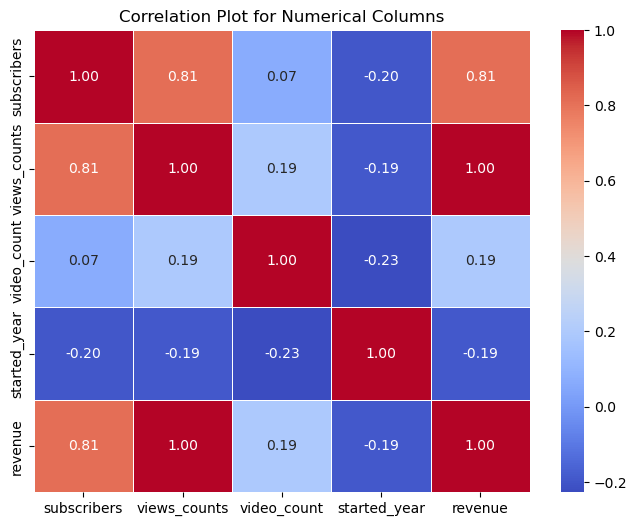

In [41]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Add title
plt.title('Correlation Plot for Numerical Columns')

# Display the plot
plt.show()


### Observation:

    correlation plot we can say that the Revenue is directly proprsional to the video views,similary the revnue is also directly proprsional to Subscribers

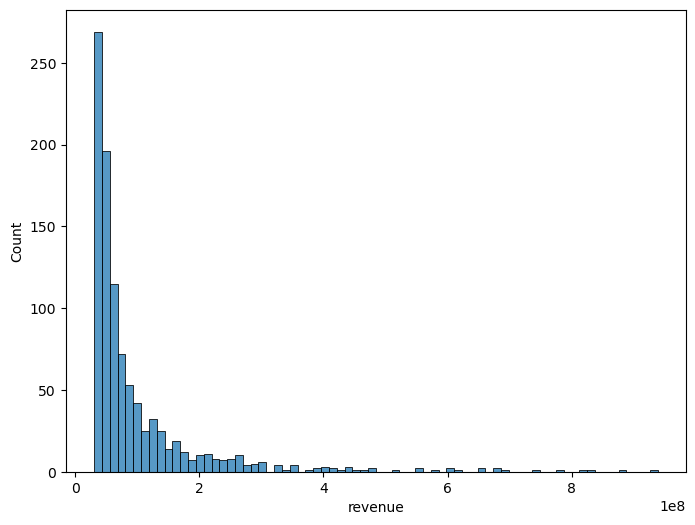

In [42]:
fig,ax=plt.subplots(figsize=(8,6))
sns.histplot(df['revenue'],ax=ax)
plt.show()

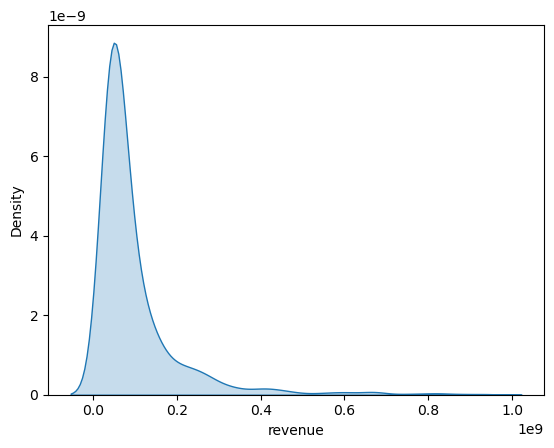

In [43]:
sns.kdeplot(df['revenue'],fill=True)
plt.show()

 ### Observation:-
 
 As we can see the above kde plot and hist plot the revenue is between 0  to 1000000000 (one billion) but most of the Revenue is between  0 to 5 million 

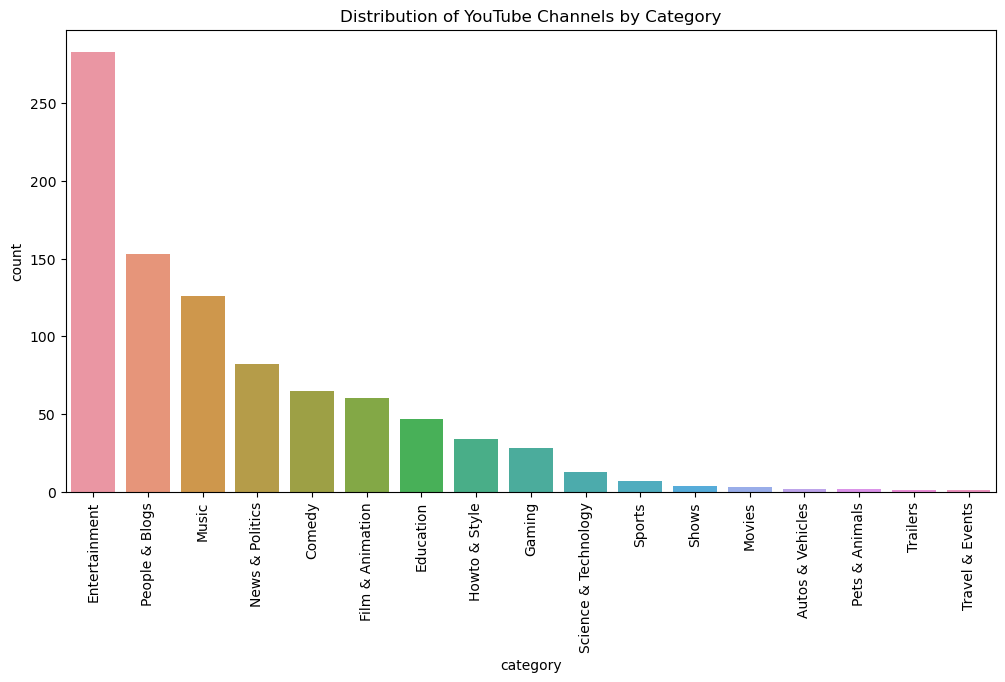

In [44]:
# Visualize the distribution of categories using a bar plot
plt.figure(figsize=(12, 6))
sns.countplot(x='category', data=df, order=df['category'].value_counts().index)
plt.title('Distribution of YouTube Channels by Category')
plt.xticks(rotation=90)
plt.show()


### Observation:-
    In the category columns the Entertainment, people & Blogs and Music are mostly channels on the youtube

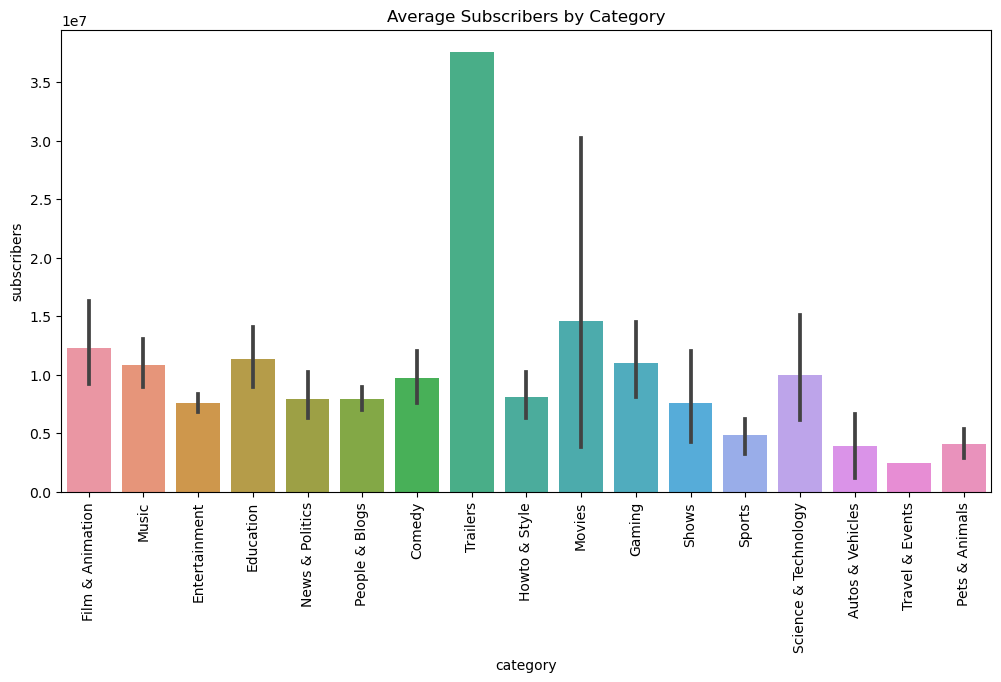

In [45]:
# print(df.dtypes)

# If 'subscribers' is not numeric, convert it to a numeric type
# Replace 'subscribers' with the actual column name if different
df['subscribers'] = pd.to_numeric(df['subscribers'], errors='coerce')

# Explore the relationship between categories and subscribers using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='subscribers', data=df)
plt.title('Average Subscribers by Category')
plt.xticks(rotation=90)
plt.show()

### Observation:
    
    Trailers,Movies,Film & Animation and Music have more subscribers and we can also estimate that category will get  more     amount of  Revenue

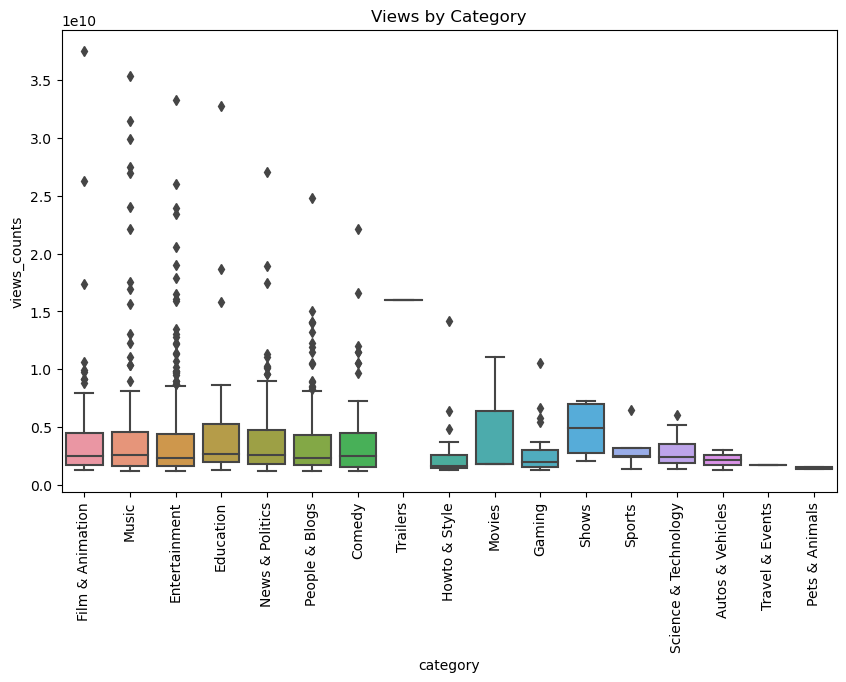

In [46]:
plt.figure(figsize=(10,6))
sns.boxplot(x='category', y='views_counts', data=df)
plt.title('Views by Category')
plt.xticks(rotation=90)
plt.show()

Observation:
    
    Music,Entertainment,News & Politics will have more views_counts so probabily of getting revenue is more for category

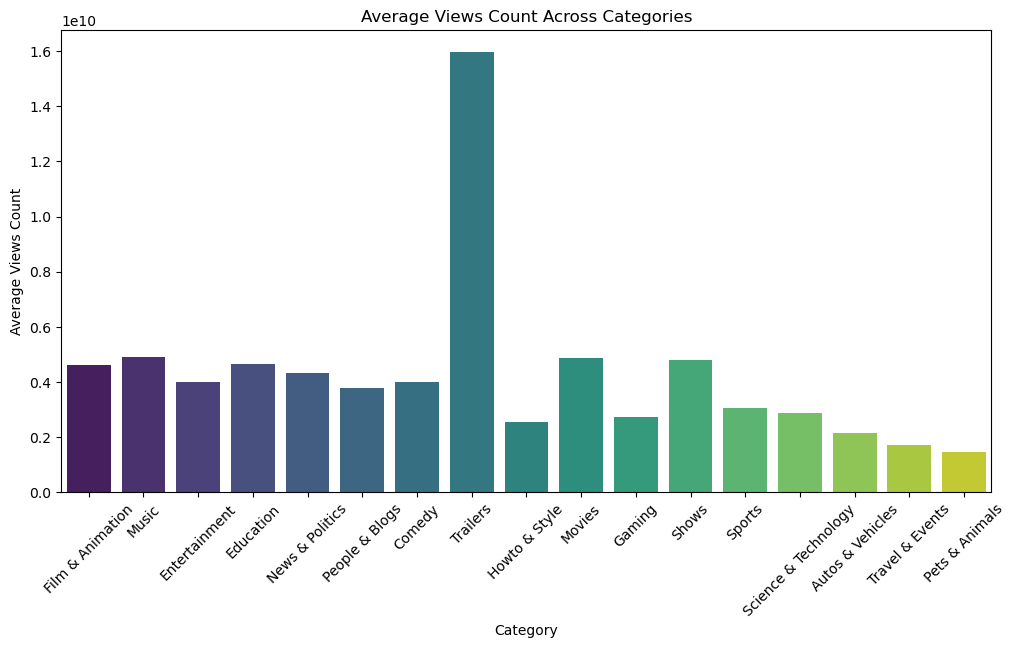

In [47]:
# Bar plot for average views count across categories
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='views_counts', data=df, errorbar=None, palette='viridis')
plt.title('Average Views Count Across Categories')
plt.xlabel('Category')
plt.ylabel('Average Views Count')
plt.xticks(rotation=45)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x800 with 0 Axes>

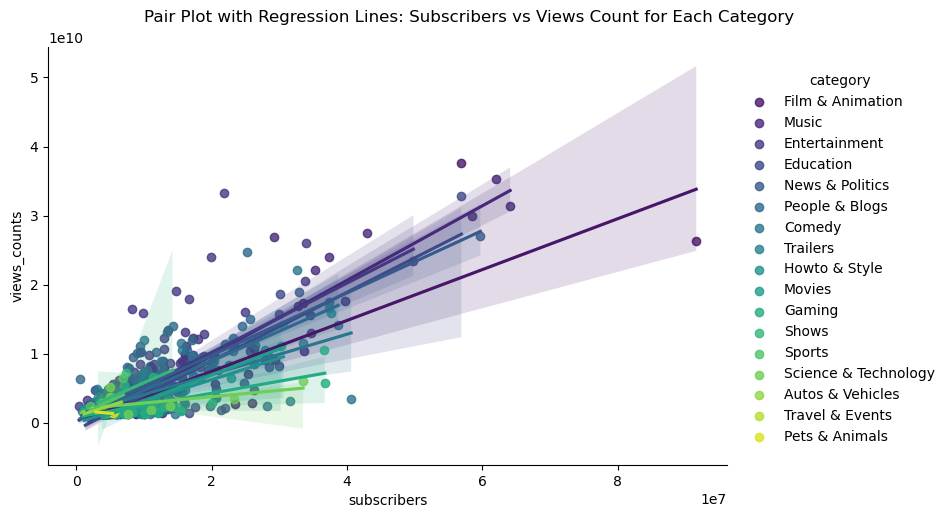

In [48]:
# Pair plot with regression lines for subscribers and views_count for each category
plt.figure(figsize=(15, 8))
sns.pairplot(df, x_vars=['subscribers'], y_vars=['views_counts'], hue='category', kind='reg', height=5, aspect=1.5, palette='viridis')
plt.suptitle('Pair Plot with Regression Lines: Subscribers vs Views Count for Each Category', y=1.02)
plt.show()


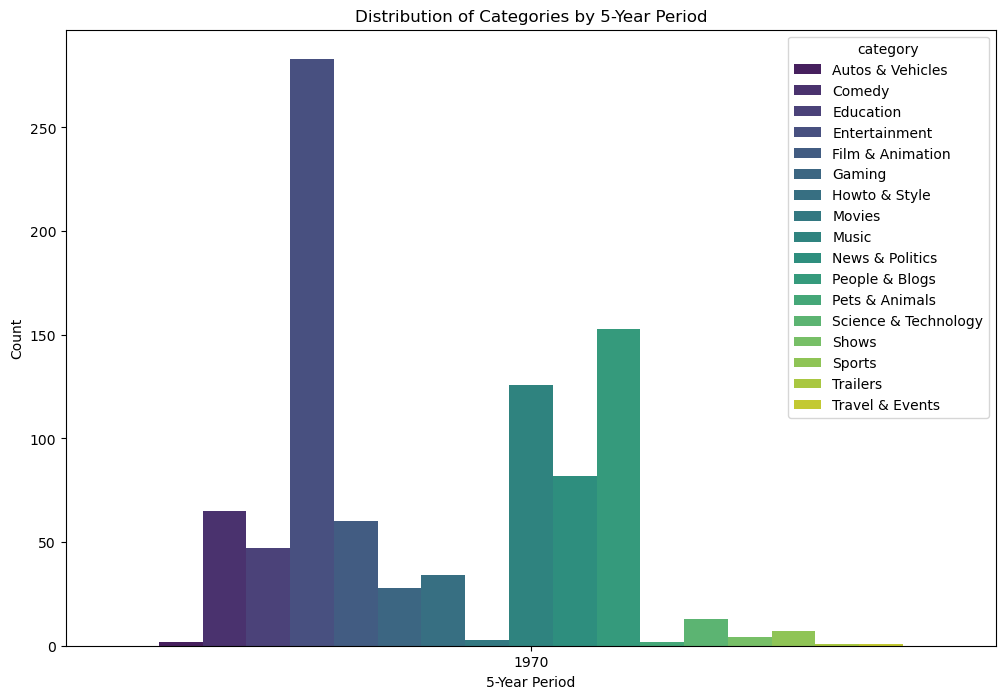

In [49]:

# Assuming 'started_year' is not in datetime format
df['started_year'] = pd.to_datetime(df['started_year'])  # Convert 'started_year' to datetime format

# Extract the 5-year period from the 'started_year' column
df['5_year_period'] = (df['started_year'].dt.year // 5) * 5

# Group by 5-year period and category, and count the number of occurrences
grouped_data = df.groupby(['5_year_period', 'category']).size().reset_index(name='count')

# Plot the distribution of categories for each 5-year period
plt.figure(figsize=(12, 8))
sns.barplot(x='5_year_period', y='count', hue='category', data=grouped_data, palette='viridis')
plt.title('Distribution of Categories by 5-Year Period')
plt.xlabel('5-Year Period')
plt.ylabel('Count')
plt.show()


In [50]:
df['started_year']

0     1970-01-01 00:00:00.000002006
1     1970-01-01 00:00:00.000002007
2     1970-01-01 00:00:00.000002007
3     1970-01-01 00:00:00.000002014
4     1970-01-01 00:00:00.000002011
                   ...             
988   1970-01-01 00:00:00.000002017
989   1970-01-01 00:00:00.000002021
990   1970-01-01 00:00:00.000002019
991   1970-01-01 00:00:00.000002019
992   1970-01-01 00:00:00.000002016
Name: started_year, Length: 993, dtype: datetime64[ns]

In [51]:
df['category'].value_counts()

category
Entertainment           283
People & Blogs          153
Music                   126
News & Politics          82
Comedy                   65
Film & Animation         60
Education                47
Howto & Style            34
Gaming                   28
Science & Technology     13
Sports                    7
Shows                     4
Movies                    3
Autos & Vehicles          2
Pets & Animals            2
Trailers                  1
Travel & Events           1
Name: count, dtype: int64

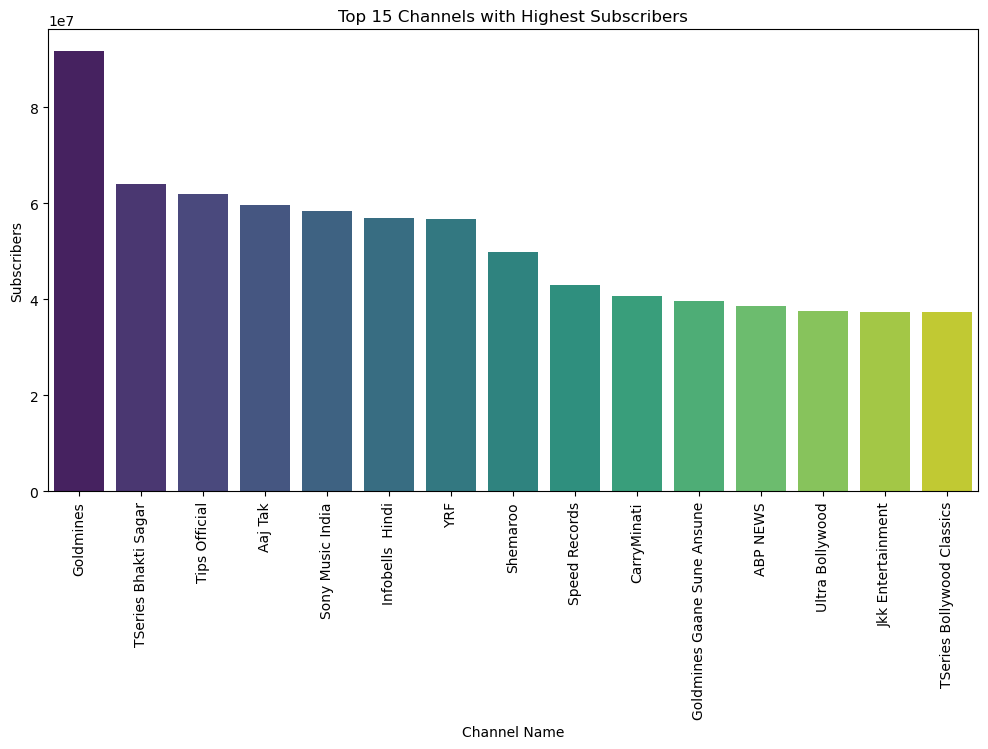

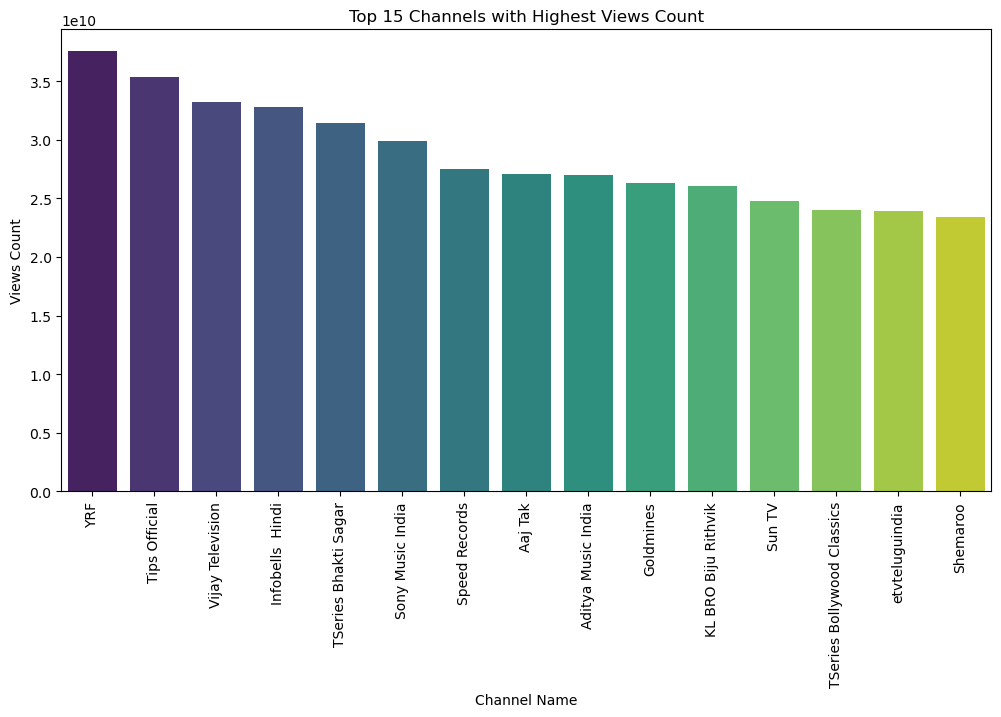

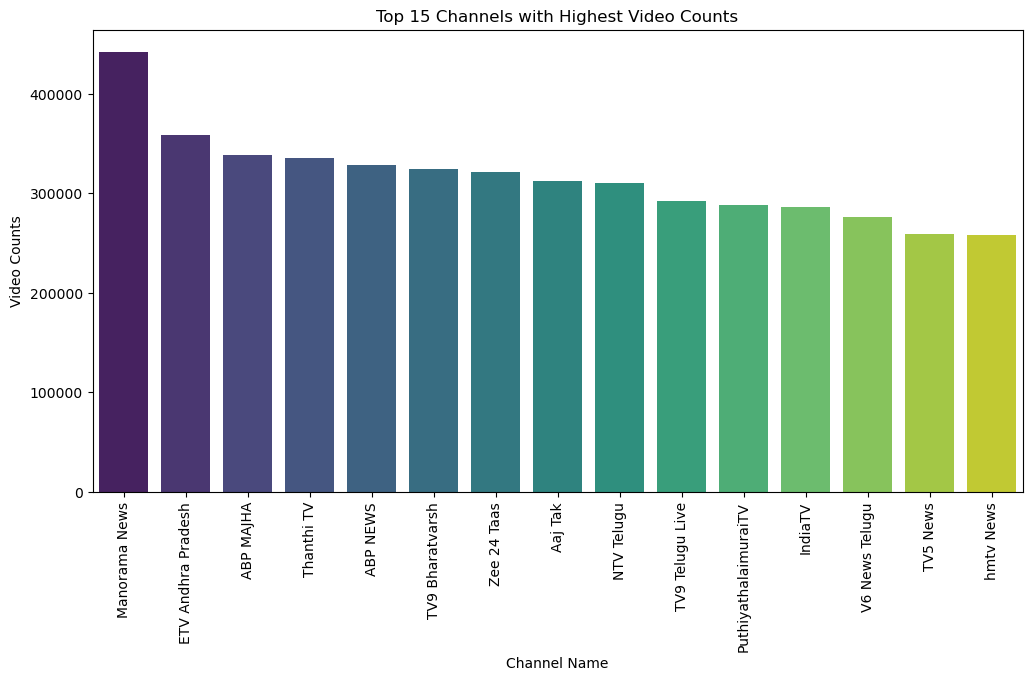

In [52]:


# Top 15 channels with highest subscribers
top_subscribers = df.nlargest(15, 'subscribers')

# Top 15 channels with highest views count
top_views = df.nlargest(15, 'views_counts')

# Top 15 channels with highest video counts
top_videos = df.nlargest(15, 'video_count')

# Plotting the top 15 channels with the highest subscribers
plt.figure(figsize=(12, 6))
sns.barplot(x='channel_name', y='subscribers', data=top_subscribers, palette='viridis')
plt.title('Top 15 Channels with Highest Subscribers')
plt.xlabel('Channel Name')
plt.ylabel('Subscribers')
plt.xticks(rotation=90)
plt.show()

# Plotting the top 15 channels with the highest views count
plt.figure(figsize=(12, 6))
sns.barplot(x='channel_name', y='views_counts', data=top_views, palette='viridis')
plt.title('Top 15 Channels with Highest Views Count')
plt.xlabel('Channel Name')
plt.ylabel('Views Count')
plt.xticks(rotation=90)
plt.show()

# Plotting the top 15 channels with the highest video counts
plt.figure(figsize=(12, 6))
sns.barplot(x='channel_name', y='video_count', data=top_videos, palette='viridis')
plt.title('Top 15 Channels with Highest Video Counts')
plt.xlabel('Channel Name')
plt.ylabel('Video Counts')
plt.xticks(rotation=90)
plt.show()




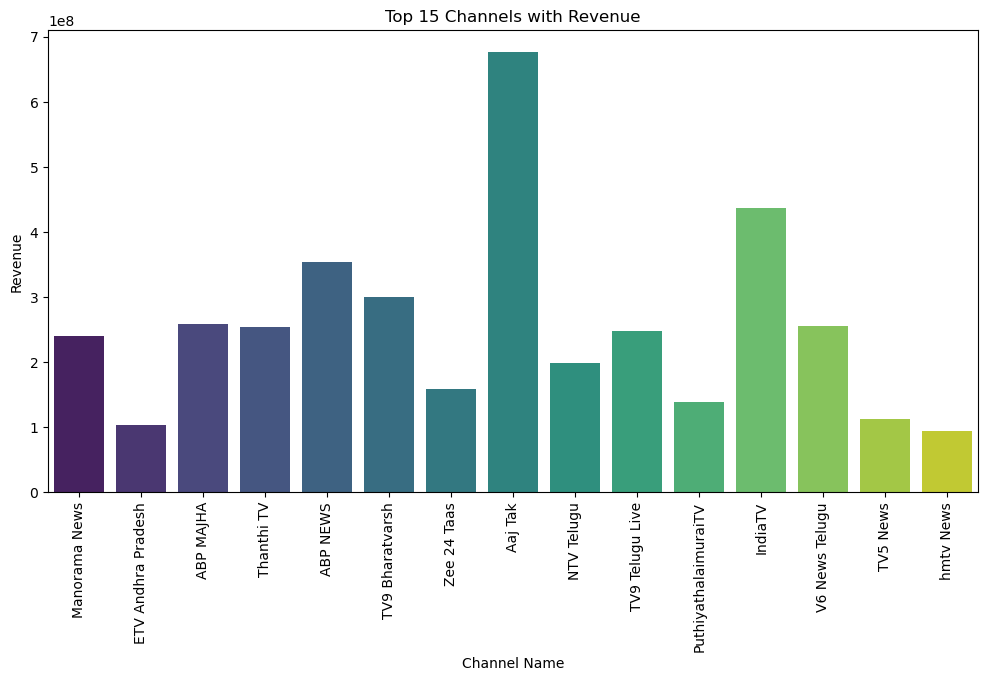

In [53]:

# Plotting the top 15 channels with the highest video counts

top_videos = df.nlargest(15, 'video_count')
plt.figure(figsize=(12, 6))

# sns.countplot(x='category', data=df, order=df['category'].value_counts().index)


sns.barplot(x='channel_name', y='revenue', data=top_videos, palette='viridis',)
plt.title('Top 15 Channels with Revenue')
plt.xlabel('Channel Name')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.show()


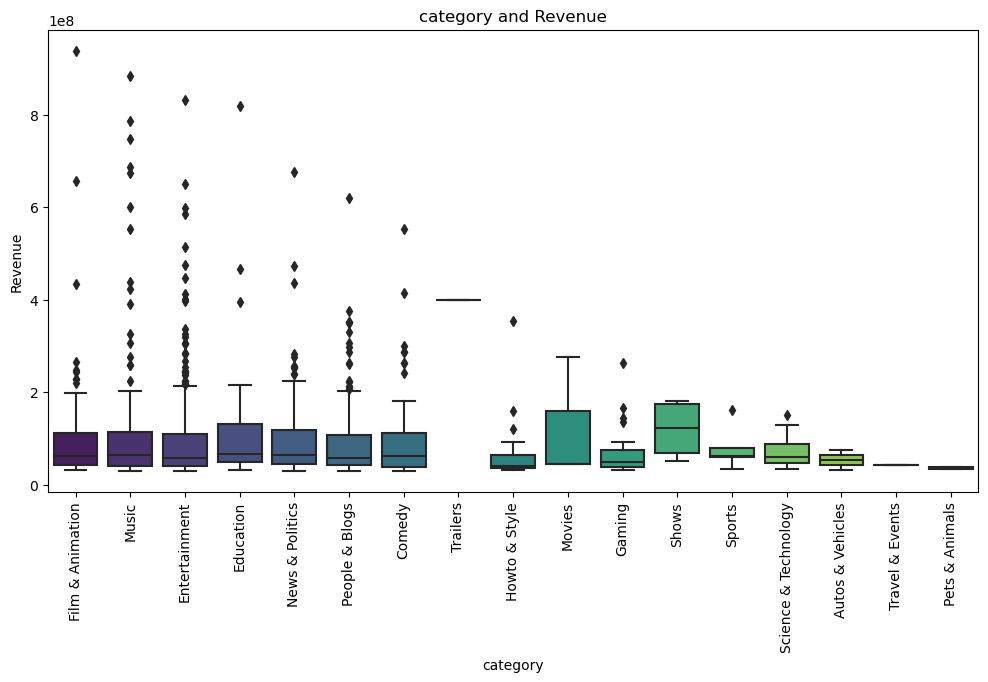

In [54]:

top_videos = df.nlargest(15, 'video_count')
plt.figure(figsize=(12, 6))

sns.boxplot(x='category', y='revenue', data=df, palette='viridis',)
plt.title('category and Revenue')
plt.xlabel('category')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.show()


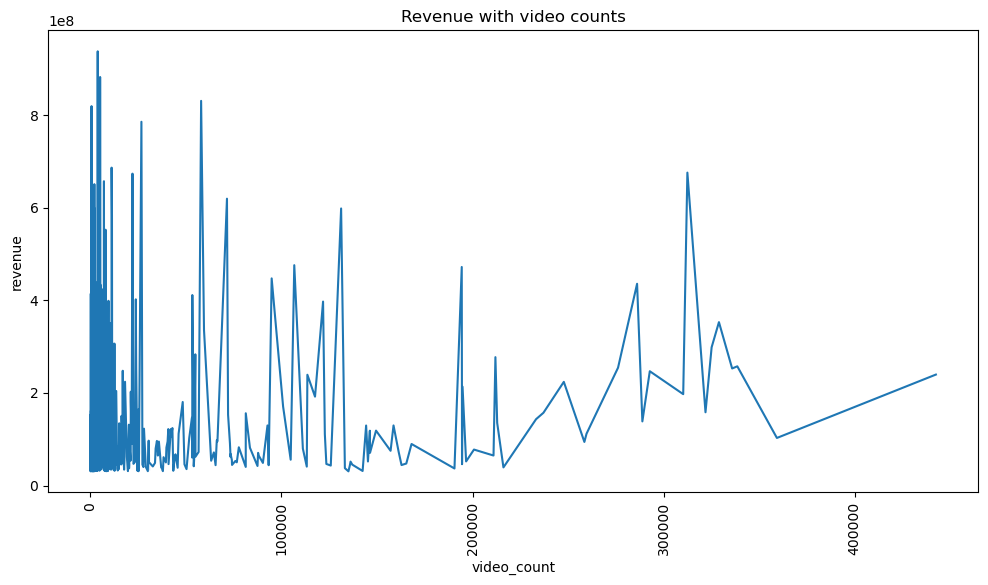

In [55]:
top_videos = df.nlargest(15, 'video_count')
plt.figure(figsize=(12, 6))
sns.lineplot(x='video_count', y='revenue', data=df)
plt.title('Revenue with video counts')
plt.xlabel('video_count')
plt.ylabel('revenue')
plt.xticks(rotation=90)
plt.show()

# Conclusions  & Insites 

In [56]:
df

,channel_name,subscribers,category,views_counts,video_count,started_year,revenue,5_year_period
0,YRF,56800000,Film & Animation,37545079015,3843,1970-01-01 00:00:00.000002006,938626975.0,1970
1,Tips Official,62000000,Music,35324377300,5093,1970-01-01 00:00:00.000002007,883109432.0,1970
2,Vijay Television,21800000,Entertainment,33261234887,57945,1970-01-01 00:00:00.000002007,831530872.0,1970
3,Infobells Hindi,56900000,Education,32804274867,608,1970-01-01 00:00:00.000002014,820106872.0,1970
4,TSeries Bhakti Sagar,64100000,Music,31453062173,26707,1970-01-01 00:00:00.000002011,786326554.0,1970
...,...,...,...,...,...,...,...,...
988,Hitz Music,4280000,Music,1230990611,732,1970-01-01 00:00:00.000002017,30774765.0,1970
989,Gaane Filmi,2790000,Music,1230850659,407,1970-01-01 00:00:00.000002021,30771266.0,1970
990,Vijay shorts,1790000,People & Blogs,1228515815,1228,1970-01-01 00:00:00.000002019,30712895.0,1970
991,Elvish Yadav Vlogs,7570000,People & Blogs,1228220319,732,1970-01-01 00:00:00.000002019,30705508.0,1970


In [57]:
g=df.groupby(["category",'category'])

In [58]:
g.first()

,,channel_name,subscribers,views_counts,video_count,started_year,revenue,5_year_period
category,category,,,,,,,
Autos & Vehicles,Autos & Vehicles,Pramod`s Life,6650000,3012866298,349,1970-01-01 00:00:00.000002015,75321657.0,1970
Comedy,Comedy,Shorts Break,32600000,22128396564,518,1970-01-01 00:00:00.000002021,553209914.0,1970
Education,Education,Infobells Hindi,56900000,32804274867,608,1970-01-01 00:00:00.000002014,820106872.0,1970
Entertainment,Entertainment,Vijay Television,21800000,33261234887,57945,1970-01-01 00:00:00.000002007,831530872.0,1970
Film & Animation,Film & Animation,YRF,56800000,37545079015,3843,1970-01-01 00:00:00.000002006,938626975.0,1970
Gaming,Gaming,Techno Gamerz,36600000,10503671551,990,1970-01-01 00:00:00.000002017,262591789.0,1970
Howto & Style,Howto & Style,Gulshan Kalra,30600000,14160344464,573,1970-01-01 00:00:00.000002018,354008612.0,1970
Movies,Movies,Aditya Movies,30200000,11076913864,6025,1970-01-01 00:00:00.000002012,276922847.0,1970
Music,Music,Tips Official,62000000,35324377300,5093,1970-01-01 00:00:00.000002007,883109432.0,1970


In [59]:


# Top 15 channels with highest subscribers
top_subscribers = df.nlargest(15, 'subscribers')

# Top 15 channels with highest views count
top_views = df.nlargest(15, 'views_counts')

# Top 15 channels with highest video counts
top_videos = df.nlargest(15, 'video_count')

In [60]:
g=df.groupby(['category','channel_name'])

In [61]:
g['revenue'].max()

category          channel_name        
Autos & Vehicles  Pramod`s Life            75321657.0
                  sansCARi sumit           32579812.0
Comedy            Aayu and Pihu Show      241456436.0
                  Akash Sagar             104725186.0
                  Apu Alone               300356945.0
                                             ...     
Sports            Struggle Jeet            60205680.0
                  Vikram Singh Fitness    161457724.0
                  âRespect               33974234.0
Trailers          Ultra Bollywood         399285528.0
Travel & Events   Hmm!                     43035484.0
Name: revenue, Length: 911, dtype: float64

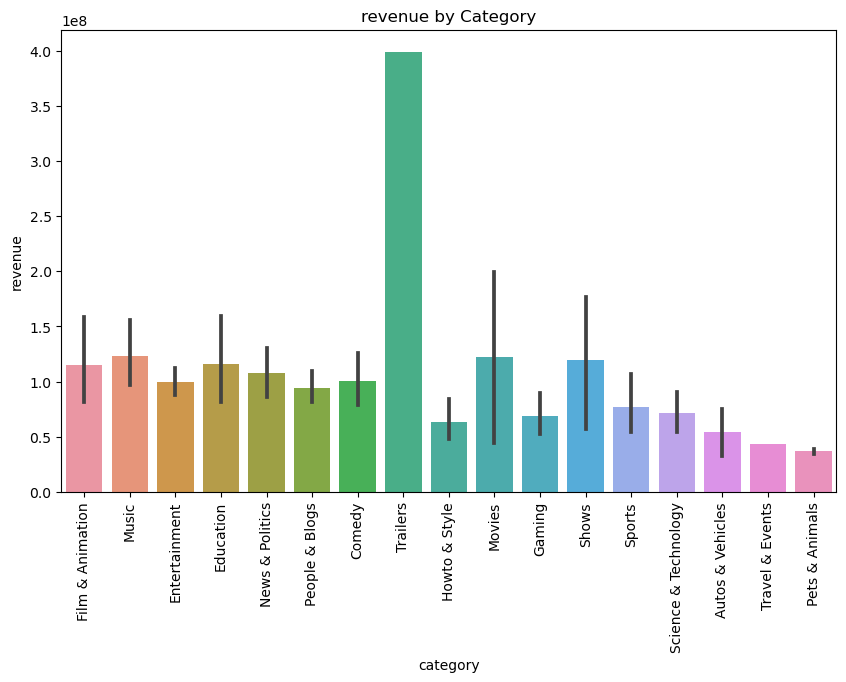

In [64]:
plt.figure(figsize=(10,6))
sns.barplot(x='category', y='revenue', data=df)
plt.title('revenue by Category')
plt.xticks(rotation=90)
plt.show()

# Insites and Conclusion:

Website:- https://pl.youtubers.me/india/all/top-1000-youtube-channels-in-india

## Revenue Depends on several Factors: 
    Category of the channel
    YouTube monetization Programmes
    Demographic features
    No. of views
    No. of subscribers

##### Highly correlated factors:  (Subscirbers, Views_count), (Views_count, revenue)

##### Educational Channels got reduced may be because of saturation or due to raise in Ed-Tech companies.

    Travel blogs got a hype after 2020.
    The categories with possibility of better revenue generation:
    Kids and Rhymes
    Music shows & Entertainment